<div style="text-align:center; background-color:#001F3F; color:white; padding:10px;">
    <h1>Etude de marché : La poule qui chante </h1>
</div>

### Sommaire
 * [Clustering](#clustering)
    * [1 - CAH](#CAH)
        * [1.2 - Standardisation des données](#standardisationclustering)
        * [1.1 - Application de la CAH](#CAH-application)
        * [1.3 - Dendrogramme](#dendrogramme)
    * [2 - Kmeans](#kmeans)
      * [2.1 - Standardisation des données](#standardisation)
      * [2.2 - La courbe de l'inertie : choix du nombre de clusters](#inertie)
      * [2.3 - Visualisation des clusters](#clusters)
      * [2.4 - Centroïdes des clusters](#centroide)
      * [2.5 - Projections des Indices sur le Centre des Corrélations](#centroide_cerclecorrelation)
      * [2.6 - Caractérisation des clusters](#caractérisation)
      * [2.7 - Boxplot des clusters](#centroide_boxplot)
      * [2.8 - Exploration du cluster](#cluster)
   * [3 - Conclusion](#conclusion)

In [1]:
#Importation des librairies
import pandas as pd
import random
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import locale
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
from plotly.io import write_image
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import plotly.graph_objects as go
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from IPython.display import display
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler, QuantileTransformer
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import QuantileTransformer
from scipy.cluster.hierarchy import fcluster

In [2]:
etudemarche = pd.read_csv('etudemarche.csv')
# Définir 'Zone' comme index
etudemarche.set_index('Zone', inplace=True)

<div id="clustering" style="border: 2px solid #001F3F; background-color: #77B5FE; padding: 10px; text-align: center;">
    <h1 style="font-weight: bold; color: #001F3F;">Clustering</h1>
</div>

<h2 id="CAH" style="border-left: 5px solid #0074CC; font-weight: bold; color: #ED0010; padding-left: 10px;">1 - CAH</h2>
<hr style="border: 1px solid #0074CC;">

<h3 id="standardisationclustering" style="border-left: 5px solid #0074CC; font-weight: bold; color: #ED0010; padding-left: 10px;">1.1 - Standardisation des données</h3>
<hr style="border: 1px solid #0074CC;">

In [3]:
# Standardisation des données 
etudemarche.columns = etudemarche.columns.map(str)
numeric_cols = etudemarche.select_dtypes(include=[np.number])
scaler = StandardScaler()
etudemarche_scaled = scaler.fit_transform(numeric_cols)
etudemarche_scaled = pd.DataFrame(etudemarche_scaled, columns=numeric_cols.columns)

# Affichage de la description des données normalisées
print(etudemarche_scaled.describe().round(2))

       Production (Milliers de tonnes) 2017  \
count                                168.00   
mean                                  -0.00   
std                                    1.00   
min                                   -0.29   
25%                                   -0.29   
50%                                   -0.26   
75%                                   -0.13   
max                                    8.50   

       Importations - Quantité (Milliers de tonnes) 2017  \
count                                             168.00   
mean                                               -0.00   
std                                                 1.00   
min                                                -0.48   
25%                                                -0.47   
50%                                                -0.40   
75%                                                -0.04   
max                                                 5.23   

       Nourriture (Milliers de tonn

<h3 id="CAH-application" style="border-left: 5px solid #0074CC; font-weight: bold; color: #ED0010; padding-left: 10px;">1.2 - Application de la CAH</h3>
<hr style="border: 1px solid #0074CC;">

In [4]:
linked = linkage(etudemarche_scaled, method='ward')

<h3 id="dendrogramme" style="border-left: 5px solid #0074CC; font-weight: bold; color: #ED0010; padding-left: 10px;">1.3 - Dendrogramme</h3>
<hr style="border: 1px solid #0074CC;">

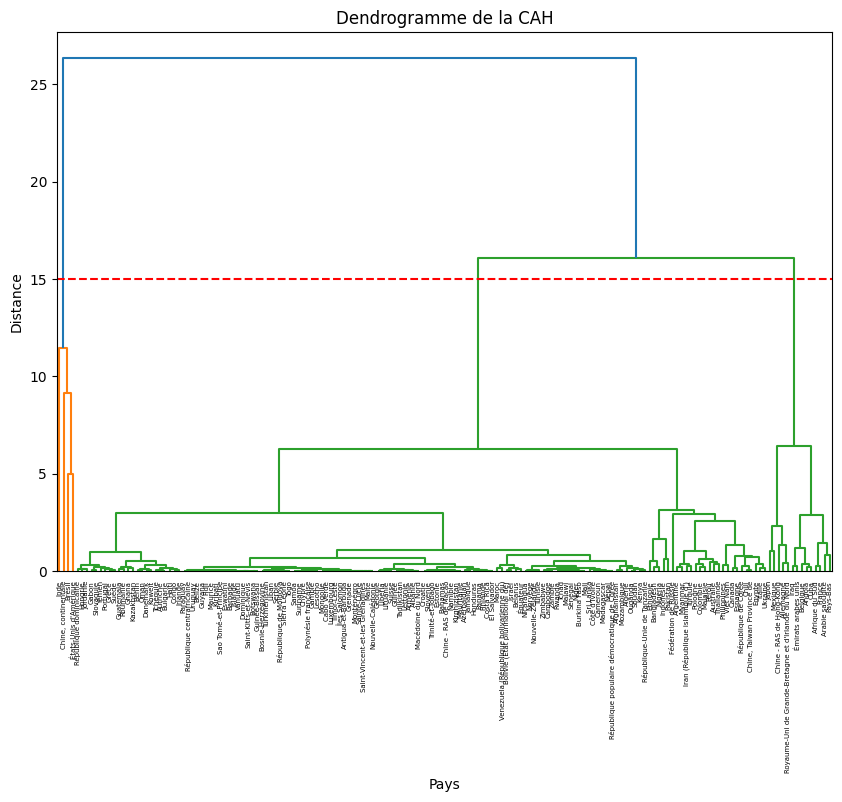

In [5]:
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=etudemarche.index, orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title('Dendrogramme de la CAH')
plt.xlabel('Pays')
plt.ylabel('Distance')


plt.axhline(y=15, color='r', linestyle='--')
plt.savefig('dendogramme.png', bbox_inches='tight', dpi=300)

plt.show()

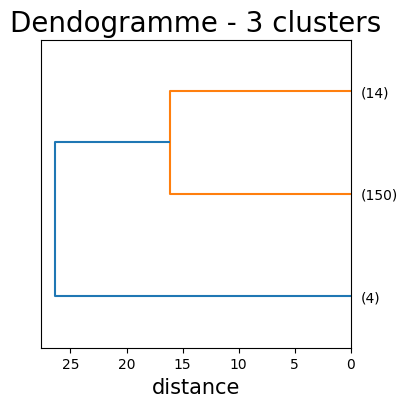

In [6]:
# Découpage du dendrogramme en 3 groupes
fig = plt.figure(figsize=(4, 4))
plt.title('Dendogramme - 3 clusters', fontsize=20)
plt.xlabel('distance', fontsize=15)
dendrogram(linked, labels=etudemarche.index.to_list(), p=3, truncate_mode='lastp', leaf_font_size=10, orientation='left')
plt.show()

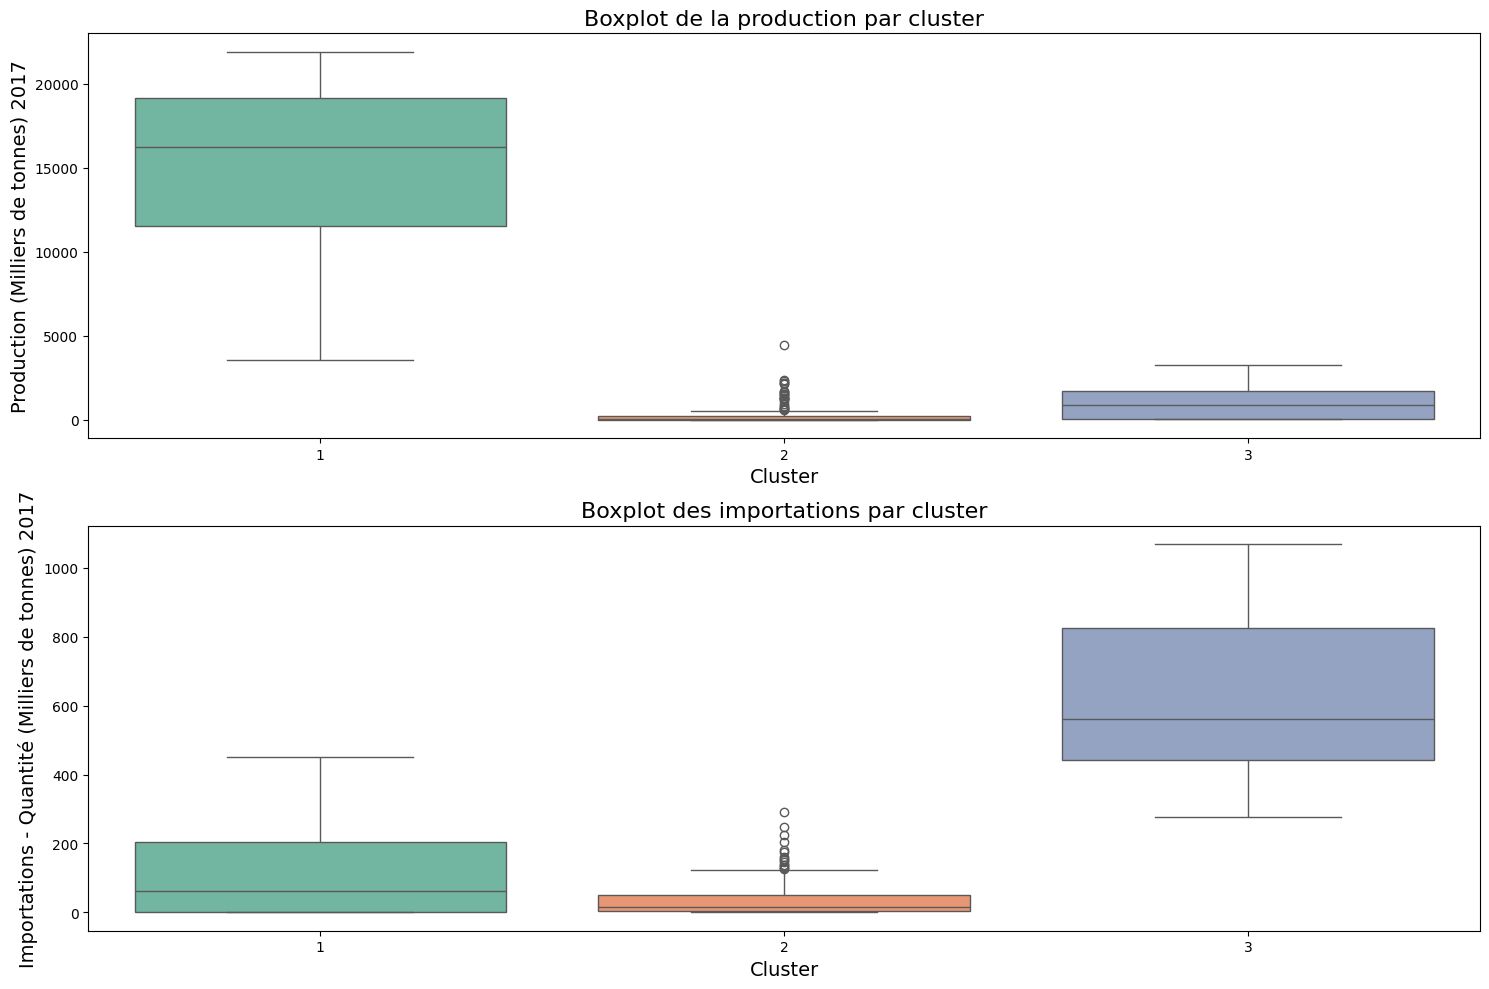

In [7]:
clusters = fcluster(linked, t=15, criterion='distance')

# Ajout des clusters au DataFrame
etudemarche['Cluster'] = clusters

# Configuration de la taille de la figure
plt.figure(figsize=(15, 10))

# Définition d'une palette de couleurs pour les clusters
palette = sns.color_palette("Set2", n_colors=etudemarche['Cluster'].nunique())

# Boxplot pour la production
plt.subplot(2, 1, 1)  # 2 lignes, 1 colonne, 1ère position
sns.boxplot(data=etudemarche, 
            x='Cluster', 
            y='Production (Milliers de tonnes) 2017', 
            hue='Cluster',  # Assigner `hue` à la même variable que `x`
            palette=palette,
            dodge=False,  # Assure que les boxplots ne sont pas séparés
            legend=False)  # Désactiver la légende générée automatiquement
plt.title('Boxplot de la production par cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Production (Milliers de tonnes) 2017', fontsize=14)

# Boxplot pour les importations
plt.subplot(2, 1, 2)  # 2 lignes, 1 colonne, 2ème position
sns.boxplot(data=etudemarche, 
            x='Cluster', 
            y='Importations - Quantité (Milliers de tonnes) 2017', 
            hue='Cluster',  # Assigner `hue` à la même variable que `x`
            palette=palette,
            dodge=False,  # Assure que les boxplots ne sont pas séparés
            legend=False)  # Désactiver la légende générée automatiquement
plt.title('Boxplot des importations par cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Importations - Quantité (Milliers de tonnes) 2017', fontsize=14)

# Ajustement de la mise en page pour éviter le chevauchement
plt.tight_layout()

# Afficher le graphique
plt.show()

In [8]:
# Ajout des clusters au DataFrame original
etudemarche['Cluster'] = clusters

# Filtrer le DataFrame pour le cluster 3
cluster_3_df = etudemarche[etudemarche['Cluster'] == 3].copy()

if cluster_3_df.empty:
    print("Aucun pays n'appartient au cluster 3.")
else:
    # Créer la colonne 'score_combine' en utilisant les données d'origine
    cluster_3_df['score_combine'] = (
        cluster_3_df['Production (Milliers de tonnes) 2017'] +
        cluster_3_df['Importations - Quantité (Milliers de tonnes) 2017'] +
        cluster_3_df['Nourriture (Milliers de tonnes) 2017']
    )

    # Trier par score combiné décroissant
    cluster_3_data_sorted = cluster_3_df[['score_combine']].sort_values(by='score_combine', ascending=False)

    # Afficher les pays du cluster 3 triés par score combiné
    print("Pays du cluster 3 triés par potentiel d'exportation (score combiné) :")
    print(cluster_3_data_sorted.round(2).to_markdown())

Pays du cluster 3 triés par potentiel d'exportation (score combiné) :
| Zone                                                |   score_combine |
|:----------------------------------------------------|----------------:|
| Mexique                                             |            8279 |
| Japon                                               |            5643 |
| Royaume-Uni de Grande-Bretagne et d'Irlande du Nord |            4724 |
| Afrique du Sud                                      |            4216 |
| Allemagne                                           |            3965 |
| France                                              |            3741 |
| Arabie saoudite                                     |            2773 |
| Pays-Bas                                            |            2054 |
| Chine - RAS de Hong-Kong                            |            1322 |
| Iraq                                                |            1127 |
| Belgique                                

In [9]:
# Suppression de la colonne 'Cluster' du DataFrame
etudemarche = etudemarche.drop('Cluster', axis=1)

<h3 style=" font-weight: bold; color: #ED0010; padding-left: 10px;"> Observation </h3>

<h2 id="Kmeans" style="border-left: 5px solid #0074CC; font-weight: bold; color: #ED0010; padding-left: 10px;">2 - Kmeans</h2>
<hr style="border: 1px solid #0074CC;">

<h3 id="standarisation" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">2.1 - Standardisation des données</h3>
<hr style="border: 1px solid #0074CC;">

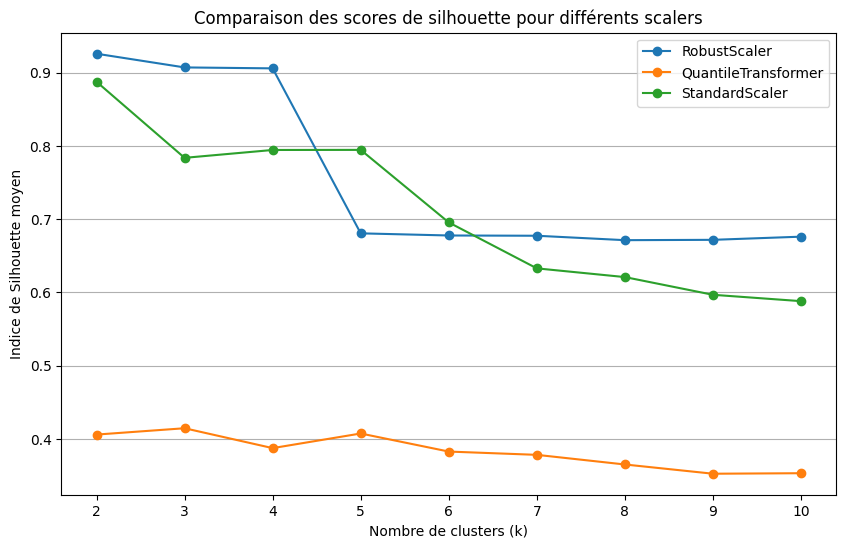

In [10]:
# 1. Application du RobustScaler
robust_scaler = RobustScaler()
etudemarche_robust_scaled = robust_scaler.fit_transform(etudemarche)
etudemarche_robust_scaled_df = pd.DataFrame(etudemarche_robust_scaled, columns=etudemarche.columns)

# 2. Application du QuantileTransformer
quantile_transformer = QuantileTransformer(n_quantiles=100, output_distribution='uniform')
etudemarche_quantile_scaled = quantile_transformer.fit_transform(etudemarche)
etudemarche_quantile_scaled_df = pd.DataFrame(etudemarche_quantile_scaled, columns=etudemarche.columns)

# Ajout de StandardScaler
standard_scaler = StandardScaler()
etudemarche_standard_scaled = standard_scaler.fit_transform(etudemarche)
etudemarche_standard_scaled_df = pd.DataFrame(etudemarche_standard_scaled, columns=etudemarche.columns)

# 3. Initialisation des paramètres
range_n_clusters = list(range(2, 11))  # Test de 2 à 10 clusters
silhouette_scores = {"RobustScaler": [], "QuantileTransformer": [], "StandardScaler": []}

# 4. Boucle d'évaluation et de clustering 
for n_clusters in range_n_clusters:
    for scaler_name, scaled_data in zip(
        ["RobustScaler", "QuantileTransformer", "StandardScaler"], 
        [etudemarche_robust_scaled_df, etudemarche_quantile_scaled_df, etudemarche_standard_scaled_df]):
        
        kmeans = KMeans(n_clusters=n_clusters, random_state=10, n_init=10)
        cluster_labels = kmeans.fit_predict(scaled_data)
        silhouette_avg = silhouette_score(scaled_data, cluster_labels)
        silhouette_scores[scaler_name].append(silhouette_avg)

# 5. Visualisation avec Matplotlib
plt.figure(figsize=(10, 6))
for scaler_name, scores in silhouette_scores.items():
    plt.plot(range_n_clusters, scores, marker='o', linestyle='-', label=scaler_name)
plt.title('Comparaison des scores de silhouette pour différents scalers')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Indice de Silhouette moyen')
plt.xticks(range_n_clusters)
plt.legend()
plt.grid(axis='y')
plt.show()


<h3 id="inertie" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">2.2 - La courbe de l'inertie : choix du nombre de clusters</h3>
<hr style="border: 1px solid #0074CC;">

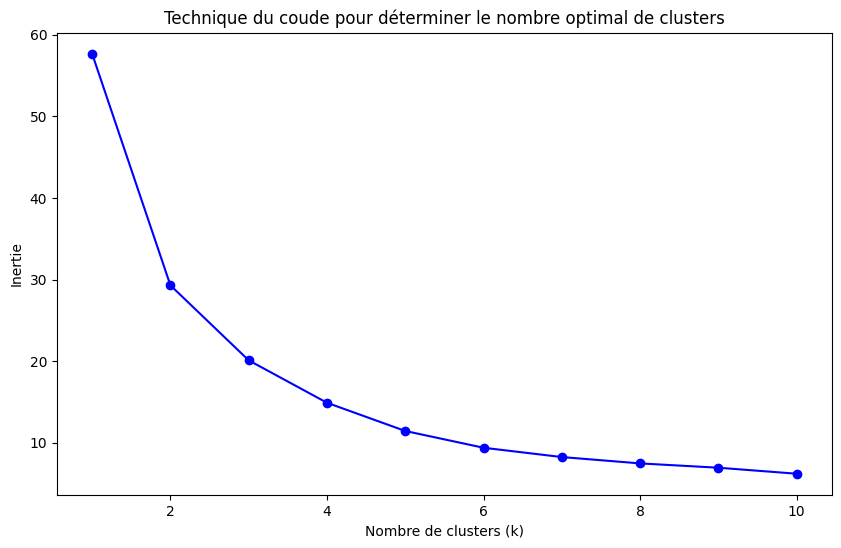

In [11]:
# Calcul de l'inertie pour différents nombres de clusters
inertias = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(etudemarche_quantile_scaled_df)
    inertias.append(kmeans.inertia_)

# Tracer la courbe de l'inertie en fonction du nombre de clusters
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bo-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Technique du coude pour déterminer le nombre optimal de clusters')
plt.savefig('technique_du_coude.png', bbox_inches='tight', dpi=300)
plt.show()

<h3 id="clusters" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">2.3 - Visualisation des clusters</h3>
<hr style="border: 1px solid #0074CC;">

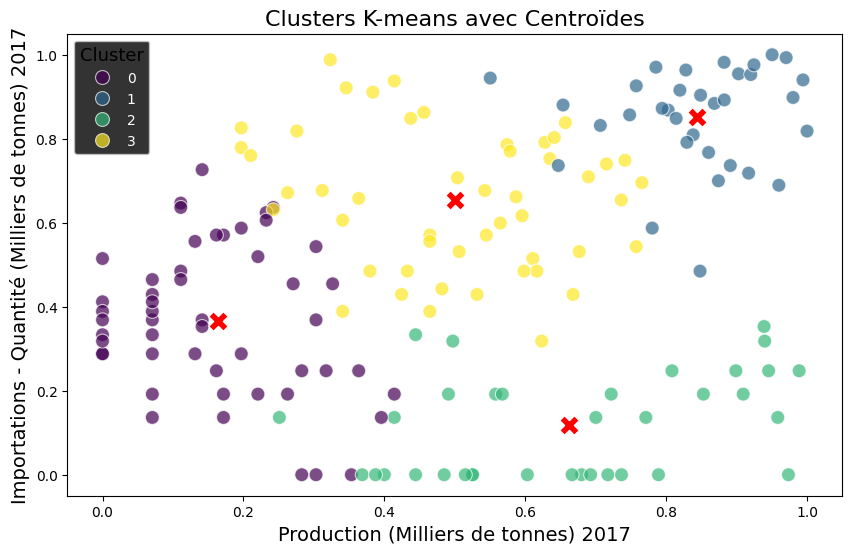

In [12]:
# Appliquer QuantileTransformer à toutes les colonnes
quantile_transformer = QuantileTransformer(n_quantiles=100, output_distribution='uniform')
etudemarche_quantile_scaled = quantile_transformer.fit_transform(etudemarche)

# Créer un DataFrame avec les données transformées
etudemarche_quantile_scaled_df = pd.DataFrame(etudemarche_quantile_scaled, columns=etudemarche.columns)
etudemarche_quantile_scaled_df['Pays'] = etudemarche.index  # Ajouter les noms des pays

# Appliquer K-means avec 4 clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=50)
etudemarche_quantile_scaled_df['Cluster'] = kmeans.fit_predict(etudemarche_quantile_scaled_df.drop(columns=['Pays']))

# Extraire les centroïdes des clusters
centroids = kmeans.cluster_centers_

# Afficher les centroïdes sous forme de DataFrame
centroids_df = pd.DataFrame(centroids, columns=etudemarche.columns)

# Visualiser les clusters et ajouter les centroïdes
plt.figure(figsize=(10, 6), facecolor='none')
ax = plt.gca()
ax.patch.set_alpha(0)

# Tracé des points des clusters
scatter = sns.scatterplot(
    data=etudemarche_quantile_scaled_df, 
    x='Production (Milliers de tonnes) 2017', 
    y='Importations - Quantité (Milliers de tonnes) 2017', 
    hue='Cluster', 
    palette='viridis', 
    s=100, 
    alpha=0.7,
    edgecolor='white'
)

# Ajouter les centroïdes
for idx, centroid in centroids_df.iterrows():
    plt.scatter(
        centroid['Production (Milliers de tonnes) 2017'], 
        centroid['Importations - Quantité (Milliers de tonnes) 2017'], 
        marker='X', 
        s=200, 
        c='red',
        edgecolor='white'
    )

# Personnalisation des axes et des titres
plt.title('Clusters K-means avec Centroïdes', fontsize=16)
plt.xlabel('Production (Milliers de tonnes) 2017', fontsize=14)
plt.ylabel('Importations - Quantité (Milliers de tonnes) 2017', fontsize=14)
plt.legend(title='Cluster', title_fontsize='13', loc='upper left', facecolor='black')
plt.setp(ax.get_legend().get_texts(), color='white')

# Enlever la grille
ax.grid(False)

# Sauvegarder le graphique
plt.savefig('clusters_centroïdes_transparent.png', bbox_inches='tight', dpi=300, transparent=True, facecolor='none')

plt.show()

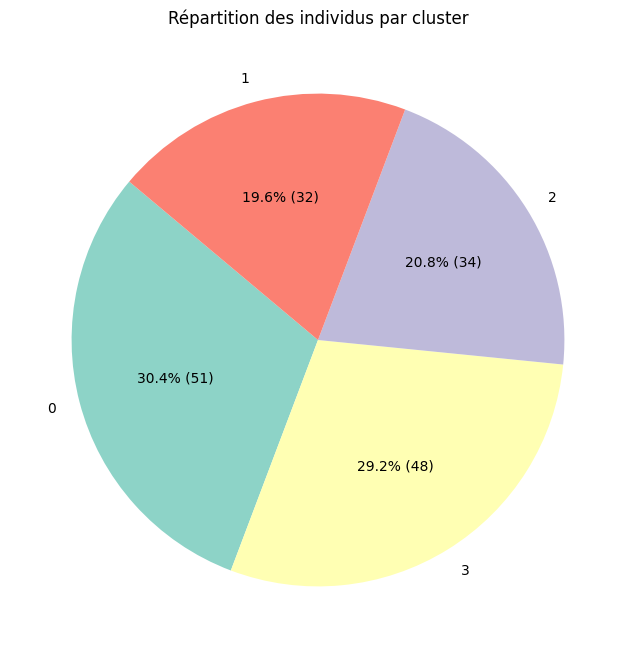

In [13]:

# Comptage des individus par cluster
cluster_counts = etudemarche_quantile_scaled_df['Cluster'].value_counts()
palette = sns.color_palette("Set3", len(cluster_counts))

# Graphique camembert des clusters
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct=lambda p: f'{p:.1f}% ({int(p * sum(cluster_counts) / 100)})', startangle=140, colors=palette)
plt.title('Répartition des individus par cluster')
plt.savefig('camembert_clusters.png', bbox_inches='tight', dpi=300)
plt.show()


<h3 id="centroide" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">2.4 - Centroïdes des clusters</h3>
<hr style="border: 1px solid #0074CC;">

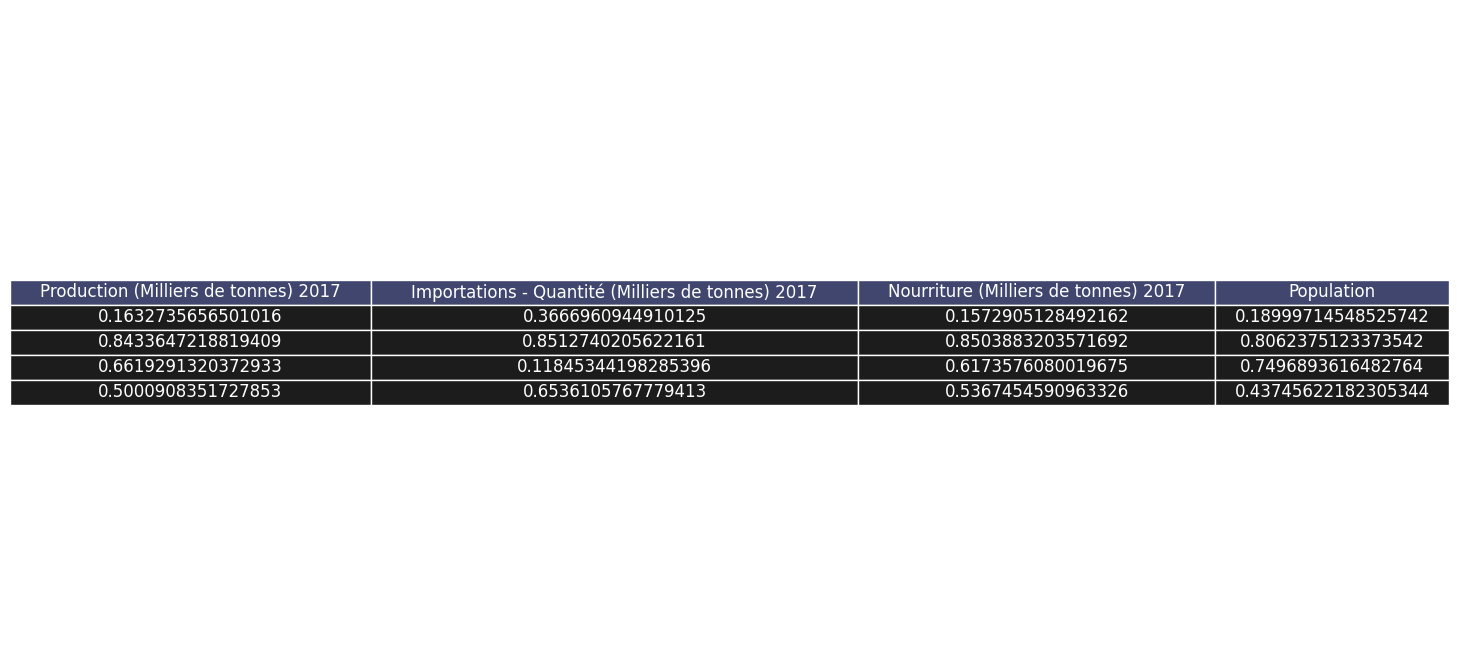

In [14]:
# Create a plot
fig, ax = plt.subplots(figsize=(15, 8))
ax.axis('tight')
ax.axis('off')

# Create a table and adjust column width
table = ax.table(cellText=centroids_df.values,
                 colLabels=centroids_df.columns,
                 cellLoc='center',
                 loc='center')

# Styling the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)  # Increase size of table

# Change text and background colors
table.auto_set_column_width(col=list(range(len(centroids_df.columns))))
for key, cell in table.get_celld().items():
    cell.set_edgecolor('white')
    if key[0] == 0:  # header
        cell.set_text_props(color='white')
        cell.set_facecolor('#40466e')
    else:
        cell.set_text_props(color='white')
        cell.set_facecolor('#1c1c1c')

plt.title('Centroïdes des clusters K-means', color='white', fontsize=16)

# Set the background color of the plot
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Save as image
plt.savefig('centroides.png', bbox_inches='tight', dpi=300, facecolor=fig.get_facecolor())

plt.show()

<h3 id="centroide_cerclecorrelation" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">2.5 - Projections des Indices sur le Centre des Corrélations</h3>
<hr style="border: 1px solid #0074CC;">

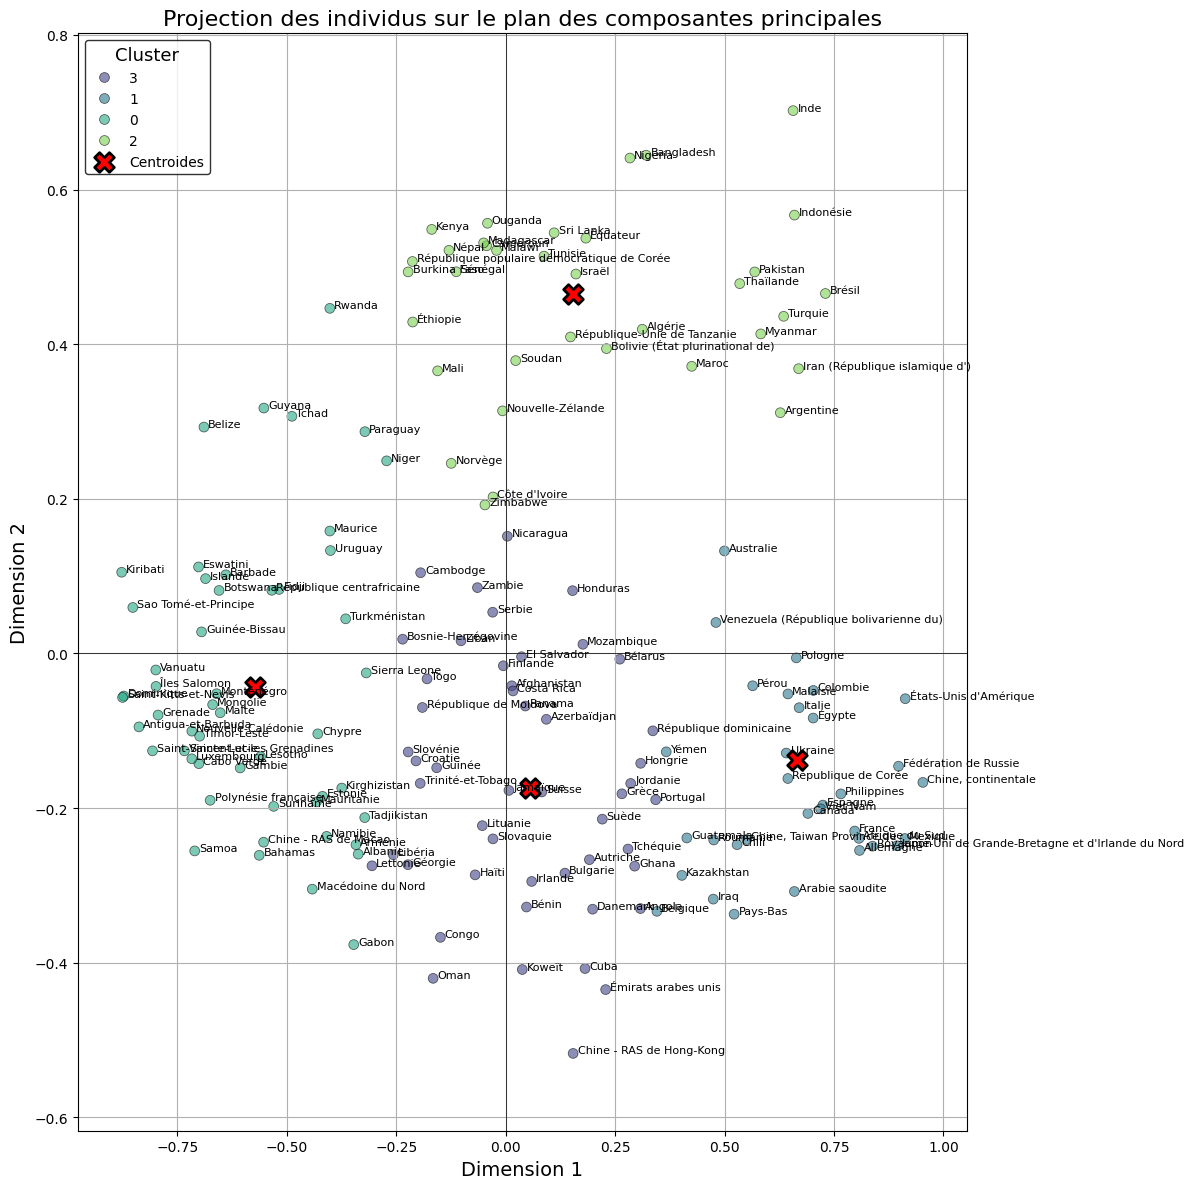

In [15]:
quantile_transformer = QuantileTransformer(n_quantiles=100, output_distribution='uniform')
etudemarche_quantile_scaled = quantile_transformer.fit_transform(etudemarche)
etudemarche_quantile_scaled_df = pd.DataFrame(etudemarche_quantile_scaled, columns=etudemarche.columns)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=50)
etudemarche_quantile_scaled_df['Cluster'] = kmeans.fit_predict(etudemarche_quantile_scaled_df)

# 3. Application de PCA pour réduire à 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(etudemarche_quantile_scaled_df.drop(columns=['Cluster']))

# 4. Création d'un DataFrame avec les résultats PCA
pca_df = pd.DataFrame(pca_result, columns=['Dimension 1', 'Dimension 2'])

# 5. Ajout des étiquettes de cluster et des pays APRÈS l'ACP
pca_df['Cluster'] = etudemarche_quantile_scaled_df['Cluster'].astype(str)
pca_df['Pays'] = etudemarche.index

# 6. Recalcul des centroïdes dans l'espace PCA
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=0, n_init=50)
kmeans_pca.fit(pca_df[['Dimension 1', 'Dimension 2']])
centroids_pca = kmeans_pca.cluster_centers_

# Création de la visualisation
plt.figure(figsize=(12, 12), facecolor='none')  # facecolor='none' pour fond transparent
ax = plt.gca()
ax.patch.set_alpha(0)  # Rendre la zone du graphique transparente

# Tracé des points des individus avec les couleurs des clusters
sns.scatterplot(
    data=pca_df, 
    x='Dimension 1', 
    y='Dimension 2', 
    hue='Cluster', 
    palette='viridis', 
    s=50, 
    alpha=0.6, 
    marker='o', 
    edgecolor='black'  # Bordure des points en noir pour une meilleure visibilité
)

# Ajouter les centroides
plt.scatter(
    centroids_pca[:, 0], 
    centroids_pca[:, 1], 
    color='red', 
    marker='X', 
    s=200, 
    edgecolor='black', 
    linewidth=2, 
    label='Centroides'
)

# Ajout des lignes des axes X et Y
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Légendes et titres
plt.title('Projection des individus sur le plan des composantes principales', fontsize=16)
plt.xlabel('Dimension 1', fontsize=14)
plt.ylabel('Dimension 2', fontsize=14)
plt.legend(title='Cluster', loc='upper left', facecolor='white', edgecolor='black', title_fontsize='13')

for i, row in pca_df.iterrows():
    plt.text(row['Dimension 1'] + 0.01, row['Dimension 2'], row['Pays'], fontsize=8, ha='left', color='black')

plt.xlim(min(pca_df['Dimension 1']) - 0.1, max(pca_df['Dimension 1']) + 0.1)
plt.ylim(min(pca_df['Dimension 2']) - 0.1, max(pca_df['Dimension 2']) + 0.1)

# Bordures et ticks en noir
ax.tick_params(colors='black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

# Affichage du graphique avec un fond transparent
plt.grid(True)
plt.tight_layout()

# Sauvegarder le graphique avec fond transparent
plt.savefig('pca_clusters_transparent_no_white_text.png', bbox_inches='tight', dpi=300, transparent=True, facecolor='none')

plt.show()

In [16]:
quantile_transformer = QuantileTransformer(n_quantiles=100, output_distribution='uniform')
etudemarche_quantile_scaled = quantile_transformer.fit_transform(etudemarche)
etudemarche_quantile_scaled_df = pd.DataFrame(etudemarche_quantile_scaled, columns=etudemarche.columns)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=50)
etudemarche_quantile_scaled_df['Cluster'] = kmeans.fit_predict(etudemarche_quantile_scaled_df)
etudemarche_quantile_scaled_df['Pays'] = etudemarche.index

<h3 id="caracterisation" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">2.6 - Caractérisation des clusters</h3>
<hr style="border: 1px solid #0074CC;">

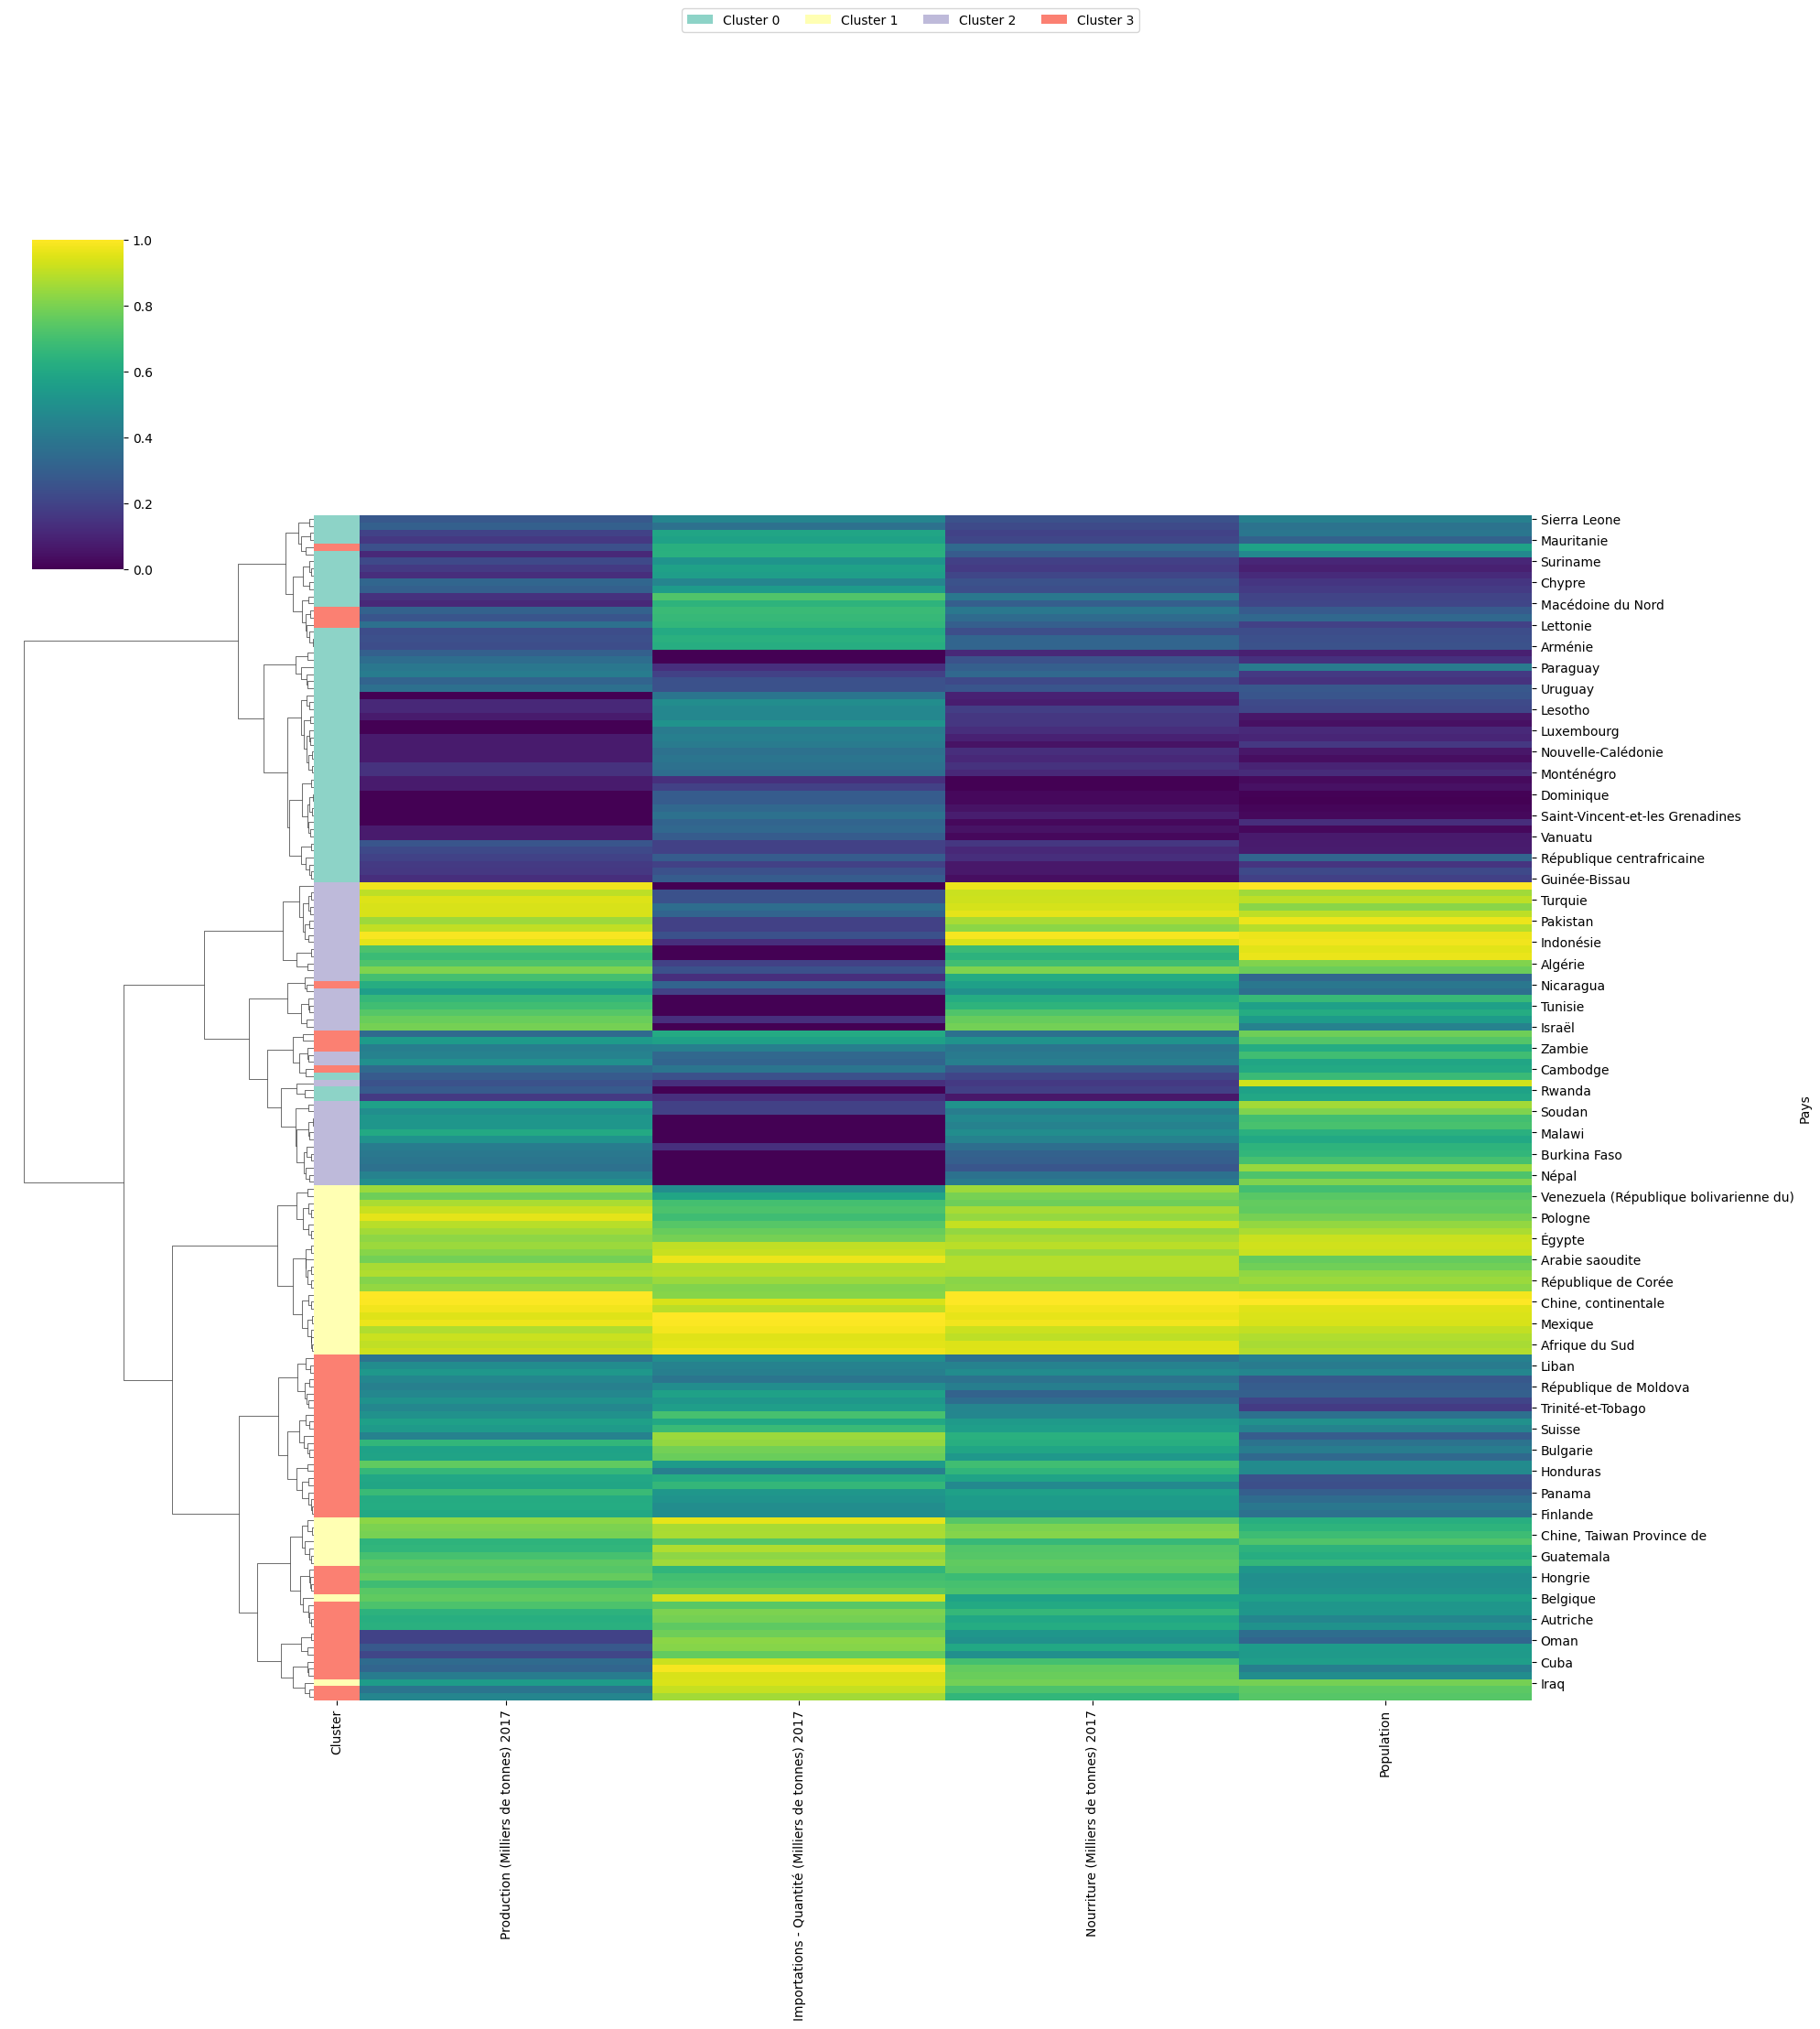

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
from sklearn.cluster import KMeans
import pandas as pd

# Appliquer QuantileTransformer à toutes les colonnes
quantile_transformer = QuantileTransformer(n_quantiles=100, output_distribution='uniform')
etudemarche_quantile_scaled = quantile_transformer.fit_transform(etudemarche)

# Créer un DataFrame avec les données transformées
etudemarche_quantile_scaled_df = pd.DataFrame(etudemarche_quantile_scaled, columns=etudemarche.columns)
etudemarche_quantile_scaled_df['Pays'] = etudemarche.index  # Ajouter les noms des pays

# Appliquer K-means avec 4 clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=50)
etudemarche_quantile_scaled_df['Cluster'] = kmeans.fit_predict(etudemarche_quantile_scaled_df.drop(columns=['Pays']))

# Réintégrer les noms des pays dans le DataFrame
etudemarche_quantile_scaled_df.set_index('Pays', inplace=True)

# Définir la palette de couleurs pour les clusters
cluster_palette = sns.color_palette("Set3", n_colors=optimal_k)
cluster_colors = etudemarche_quantile_scaled_df['Cluster'].map(dict(zip(range(optimal_k), cluster_palette)))

# Créer un heatmap avec sns.clustermap
g = sns.clustermap(
    etudemarche_quantile_scaled_df.drop(['Cluster'], axis=1),  # On élimine les colonnes 'Cluster' pour le clustering
    cmap='viridis',  # Choix de la carte de couleurs
    method='ward',  # Méthode de clustering
    metric='euclidean',  # Métrique de distance
    standard_scale=1,  # Normaliser les données par colonnes
    figsize=(20, 20),  # Taille de la figure
    row_colors=cluster_colors,  # Couleurs des lignes
    col_cluster=False  # Ne regroupez que les lignes, pas les colonnes
)

# Ajouter une légende pour les clusters
for label in range(optimal_k):
    g.ax_row_dendrogram.bar(0, 0, color=cluster_palette[label], label=f'Cluster {label}', linewidth=0)

g.ax_row_dendrogram.legend(loc='center', ncol=optimal_k, bbox_to_anchor=(0.5, 1.1), bbox_transform=plt.gcf().transFigure)

# Rendre le fond transparent
g.cax.set_facecolor((1, 1, 1, 0))
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90)

# Rendre les patches transparents
g.ax_heatmap.patch.set_alpha(0)
g.ax_row_dendrogram.patch.set_alpha(0)
g.ax_col_dendrogram.patch.set_alpha(0)

# Sauvegarde de la figure avec fond transparent
plt.savefig('Heatmap_Cluster.png', bbox_inches='tight', dpi=300, transparent=True)

# Afficher le graphique
plt.show()


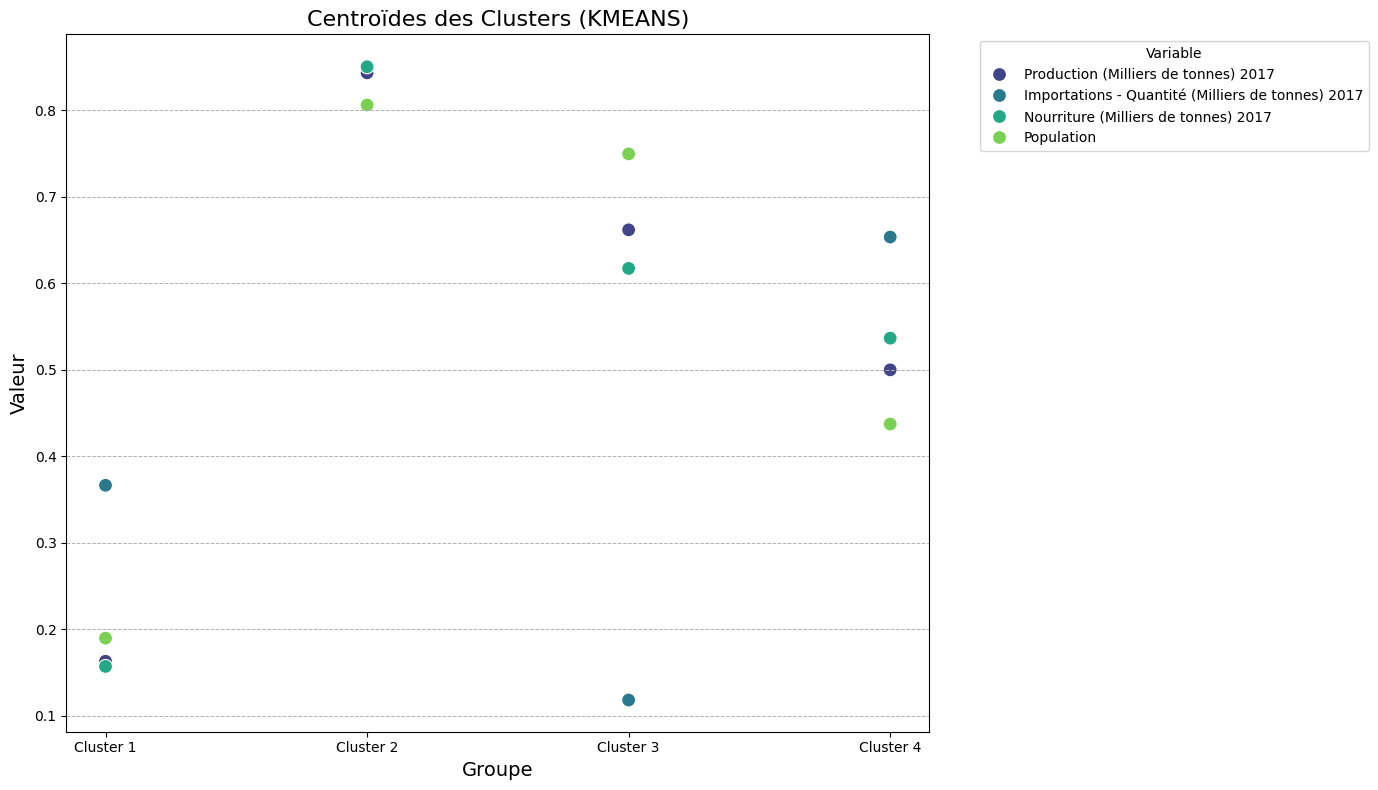

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
from sklearn.cluster import KMeans
import pandas as pd

# Appliquer QuantileTransformer à toutes les colonnes
quantile_transformer = QuantileTransformer(n_quantiles=100, output_distribution='uniform')
etudemarche_quantile_scaled = quantile_transformer.fit_transform(etudemarche)
etudemarche_quantile_scaled_df = pd.DataFrame(etudemarche_quantile_scaled, columns=etudemarche.columns)
etudemarche_quantile_scaled_df.index = etudemarche.index

# Appliquer K-means avec 4 clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=50)
etudemarche_quantile_scaled_df['Cluster'] = kmeans.fit_predict(etudemarche_quantile_scaled_df)

# Extraire les centroïdes des clusters
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=etudemarche.columns)
centroids_df['Cluster'] = range(1, optimal_k + 1)

# Préparation des données pour la visualisation
centroids_melted = centroids_df.melt(id_vars='Cluster', var_name='Variable', value_name='Value')

# Graphique des centroïdes
fig, ax = plt.subplots(figsize=(14, 8))

# Utiliser scatterplot pour créer le graphique
sns.scatterplot(data=centroids_melted, 
                x='Cluster', 
                y='Value', 
                hue='Variable', 
                palette='viridis', 
                s=100, 
                marker='o', 
                ax=ax)

# Personnalisation de la légende
plt.legend(title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')  # Légende à l'extérieur

# Titre et étiquettes
plt.title('Centroïdes des Clusters (KMEANS)', fontsize=16)
plt.xlabel('Groupe', fontsize=14)
plt.ylabel('Valeur', fontsize=14)

# Ajustement des ticks de l'axe X pour ne montrer que les clusters
plt.xticks(ticks=[1, 2, 3, 4], labels=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

# Enlever les lignes de grille intermédiaires pour une meilleure lisibilité
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Rendre le fond transparent
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

# Ajustement de la mise en page
plt.tight_layout()

# Sauvegarde du graphique avec fond transparent
plt.savefig('centroides_clusters_ameliore.png', bbox_inches='tight', dpi=300, transparent=True)

# Afficher le graphique
plt.show()


<h3 id="centroide_boxplot" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">2.7 - Boxplot des Clusters</h3>
<hr style="border: 1px solid #0074CC;">

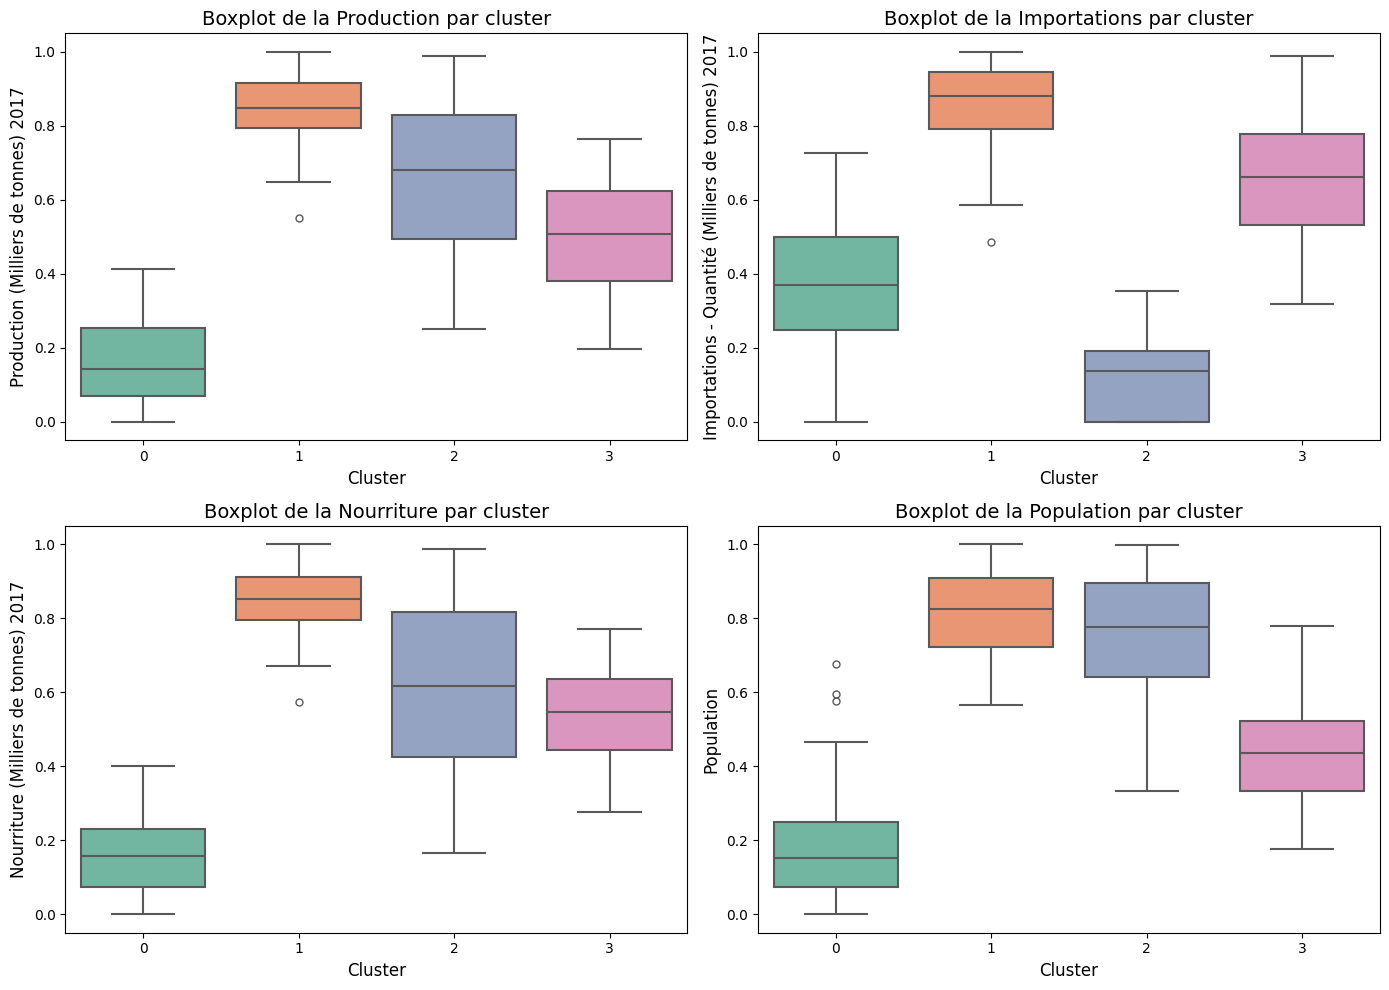

In [19]:
# Définition d'une palette de couleurs pour les clusters
palette = sns.color_palette("Set2", len(etudemarche_quantile_scaled_df['Cluster'].unique()))

# Configuration de la taille de la figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2 lignes, 2 colonnes

variables = [
    ('Production (Milliers de tonnes) 2017', 'Production'),
    ('Importations - Quantité (Milliers de tonnes) 2017', 'Importations'),
    ('Nourriture (Milliers de tonnes) 2017', 'Nourriture'),
    ('Population', 'Population')
]

for ax, (column, title) in zip(axes.flatten(), variables):
    sns.boxplot(data=etudemarche_quantile_scaled_df,
                x='Cluster',
                y=column,
                palette=palette,
                hue='Cluster',  # Assigner hue à la même variable que x
                dodge=False,
                linewidth=1.5,  # Augmenter l'épaisseur des lignes des boîtes
                fliersize=5,   # Taille des points extrêmes (outliers)
                ax=ax,
                legend=False)  # Désactiver la légende générée automatiquement
    ax.set_title(f'Boxplot de la {title} par cluster', fontsize=14)  # Réduire la taille du titre
    ax.set_xlabel('Cluster', fontsize=12)  # Réduire la taille de la police des étiquettes de l'axe X
    ax.set_ylabel(column, fontsize=12)  # Réduire la taille de la police des étiquettes de l'axe Y
    ax.patch.set_alpha(0)  # Fond des axes transparent

# Ajuster la mise en page pour éviter le chevauchement
plt.tight_layout()

# Configuration de la transparence
fig.patch.set_alpha(0)  # Fond de la figure transparent

# Sauvegarder le graphique avec une résolution plus élevée et un fond transparent
plt.savefig('boxplots_clusters_transparent.png', bbox_inches='tight', dpi=300, transparent=True)

# Afficher le graphique
plt.show()


<h3 id="centroide_heatmap" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">2.8 - Exploration du cluster</h3>
<hr style="border: 1px solid #0074CC;">

In [20]:
# S'assurer que les DataFrame utilisent 'Zone' (ou 'Pays') comme index
pca_df.set_index('Pays', inplace=True)
etudemarche_quantile_scaled_df.set_index(etudemarche.index, inplace=True)

# Filtrer le DataFrame pour le cluster 1
cluster_1_df = pca_df[pca_df['Cluster'] == '1'].copy()

if cluster_1_df.empty:
    print("Aucun pays n'appartient au cluster 1.")
else:
    # Joindre les DataFrames pour obtenir les valeurs nécessaires
    cluster_1_data = cluster_1_df.join(etudemarche_quantile_scaled_df, how='left', lsuffix='_pca', rsuffix='_etude')

    cluster_1_data['score_combine'] = (
        1 * cluster_1_data['Production (Milliers de tonnes) 2017'] +
        4 * cluster_1_data['Importations - Quantité (Milliers de tonnes) 2017'] +
        3 * cluster_1_data['Nourriture (Milliers de tonnes) 2017'] +
        2 * cluster_1_data['Population']
    )

    # Trier par score combiné décroissant
    cluster_1_data_sorted = cluster_1_data[['score_combine']].sort_values(by='score_combine', ascending=False)

    # Afficher les pays du cluster 1 triés par score combiné
    print("Pays du cluster 1 triés par potentiel d'exportation (score combiné) :")
    print(cluster_1_data_sorted.round(2).to_markdown())


Pays du cluster 1 triés par potentiel d'exportation (score combiné) :
| Pays                                                |   score_combine |
|:----------------------------------------------------|----------------:|
| Mexique                                             |            9.76 |
| Chine, continentale                                 |            9.75 |
| Japon                                               |            9.72 |
| Royaume-Uni de Grande-Bretagne et d'Irlande du Nord |            9.46 |
| Fédération de Russie                                |            9.42 |
| Allemagne                                           |            9.38 |
| Afrique du Sud                                      |            9.3  |
| États-Unis d'Amérique                               |            9.24 |
| France                                              |            9.2  |
| Philippines                                         |            9.02 |
| Viet Nam                                

<h2 id="conclusion" style="border-left: 5px solid #0074CC; font-weight: bold; color: #ED0010; padding-left: 10px;">3 - Conclusion</h2>
<hr style="border: 1px solid #0074CC;">